In [3]:
import numpy as np
import scipy as sp

In [8]:
def f(x):
    return x**3 / (np.exp(x) - 1)

In [20]:
value, error = sp.integrate.quad(f,0,50)

In [21]:
answer = np.pi**4/15

print(value / answer)

0.9999999999999989


In [22]:
[(1 - np.exp(-t)) for t in [0.1,2/3,1,3,10]]

[0.09516258196404048,
 0.486582880967408,
 0.6321205588285577,
 0.950212931632136,
 0.9999546000702375]

In [23]:
import astropy.constants as const
import astropy.units as u

In [28]:
h = const.h
c = const.c
k = const.k_B

In [57]:
def T(tau,Teff):
    return Teff * (0.75 * (tau + 2/3))**(0.25)

def S(nu,T):
    return (2 * h * nu**3 / (c**2 * (np.exp((h*nu)/(k*T)) - 1)))


In [52]:
S(nus[0],Temp)

<Quantity 2.04647932e-08 J / m2>

In [54]:
nus

<Quantity [1.55230729e+14, 4.65692186e+14, 1.39707656e+15] 1 / s>

In [66]:
def integrand(tau,mu,nu,Teff):
    return ((S(nu,T(tau,Teff)) / mu) * np.exp(-tau/mu)).value * 1e8

In [67]:
integrand(0.1,1,nus[0],Temp)

1.4316667747736596

In [62]:
Temp = 5700 * u.K #Sun

factor  = np.array([1/3,1,3])
xw = 3.921

def nu(x,Teff):
    return x*k*Teff/h

nus = nu(factor*xw,Temp)

In [77]:
def I(mu,nu,Teff):
    return sp.integrate.quad(integrand,a = 0,b = 100,args = (mu,nu,Teff))

In [85]:
mu = np.linspace(0.01,1,100)
theta = np.arccos(mu)
I_mu_nu = np.zeros((len(mu),len(nus)))

for j,n in enumerate(nus):
    for i,m in enumerate(mu):
        I_mu_nu[i,j] = I(m,n,Temp)[0]
    I_nu_1 = I(1,n,Temp)[0]
    I_mu_nu[:,j] /= I_nu_1



In [91]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])

In [88]:
b = 0.75 * (const.sigma_sb / np.pi) * Temp**4
a = (2/3) * b
I_bol_mu = (a + b*mu) / (a + b)

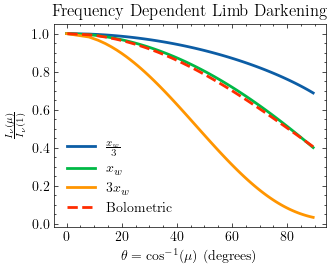

In [99]:
lw = 2
plt.plot(theta*180/np.pi, I_mu_nu[:,0], label = r'$\frac{x_w}{3}$', lw = lw)
plt.plot(theta*180/np.pi, I_mu_nu[:,1], label = r'$x_w$', lw = lw)
plt.plot(theta*180/np.pi, I_mu_nu[:,2], label = r'$3x_w$', lw = lw)
plt.plot(theta*180/np.pi, I_bol_mu, linestyle = 'dashed', label = 'Bolometric', lw = lw)
plt.xlabel(r'$\theta = \rm cos^{-1}(\mu)$ (degrees)')
plt.ylabel(r'$\frac{I_{\nu}(\mu)}{I_{\nu}(1)}$')
plt.title('Frequency Dependent Limb Darkening')
plt.legend()
plt.savefig('limb-darkening.pdf', dpi = 300)